In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Section 1: Data Cleaning and Preparation



In [14]:
# Importing the dataset and checking the first five rows of data
kt_df = pd.read_excel('kwanza_tdata.xlsx')
kt_df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,Jan-2024
1,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0,Jan-2024
2,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0,Jan-2024
3,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2,2180.0,Jan-2024
4,2024-01-01 10:45:00,Category-76,Product-113e,Business-4af0,Location-d1a8,1,7950.0,Jan-2024


Data Quality Assesment


In [15]:
# pd.options.display.max_rows = 100
kt_df.describe()

,DATE,QUANTITY,UNIT PRICE
count,329881,329881.000000,329873.000000
mean,2024-07-18 11:49:34.170867200,2.321507,2319.016579
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767796,1582.578700


In [16]:
# Checking for the data types to determine whether there are any inconsistencies.
# The UNIT PRICE column has Null Values
kt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329881 entries, 0 to 329880
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329881 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329881 non-null  object        
 2   ANONYMIZED PRODUCT   329881 non-null  object        
 3   ANONYMIZED BUSINESS  329881 non-null  object        
 4   ANONYMIZED LOCATION  329881 non-null  object        
 5   QUANTITY             329881 non-null  int64         
 6   UNIT PRICE           329873 non-null  float64       
 7   Month-Year           329881 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 20.1+ MB


In [17]:
# converting the "Month-Year" column from text format to data format
kt_df['Month-Year'] = pd.to_datetime(kt_df['Month-Year'], format='%b-%Y')

In [18]:
kt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329881 entries, 0 to 329880
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329881 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329881 non-null  object        
 2   ANONYMIZED PRODUCT   329881 non-null  object        
 3   ANONYMIZED BUSINESS  329881 non-null  object        
 4   ANONYMIZED LOCATION  329881 non-null  object        
 5   QUANTITY             329881 non-null  int64         
 6   UNIT PRICE           329873 non-null  float64       
 7   Month-Year           329881 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 20.1+ MB


In [19]:
kt_df.isnull().sum()
# There are 8 NULL values on the unit price column from the initial dataset. The 8 missing values are displayed below.
# Product-ccbc, Product 3d7f, Product 7eed, Product 84a5, Product dfc8, Product 15e0, Product 15f3, Product 9204

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
Month-Year             0
dtype: int64

In [20]:
# I opted to drop the missing values because using place holders can affect the statistical measures.
# Dropped missing values because the nunumber is small relative to the dataset
kt_df.dropna(subset=['UNIT PRICE'], inplace=True)

In [21]:
kt_df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
dtype: int64

In [22]:
kt_df.duplicated().sum()
# There were 3524 values found.

np.int64(0)

In [23]:
kt_df.drop_duplicates(inplace=True)
# 329881 are the unique values left

# Section 2: Exploratory Data Analysis


Sales Overview

In [24]:
# 1.Total Quantity and Value grouped by Anonymized Category
kt_df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'UNIT PRICE']].sum()

,QUANTITY,UNIT PRICE
ANONYMIZED CATEGORY,,
Category-100,76824,30783426.0
Category-101,19564,12225757.0
Category-102,1786,270769.0
Category-104,1217,1278629.0
Category-105,1579,2121947.0
Category-106,6521,4566978.0
Category-107,2729,3226218.0
Category-108,9756,3038145.0
Category-109,1446,806716.0


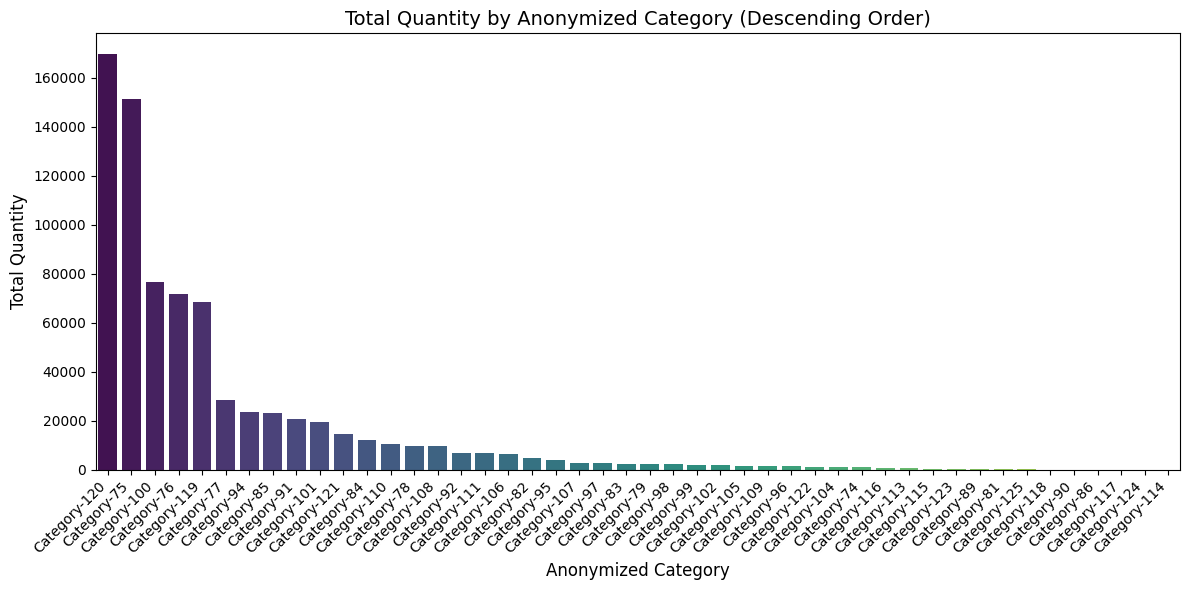

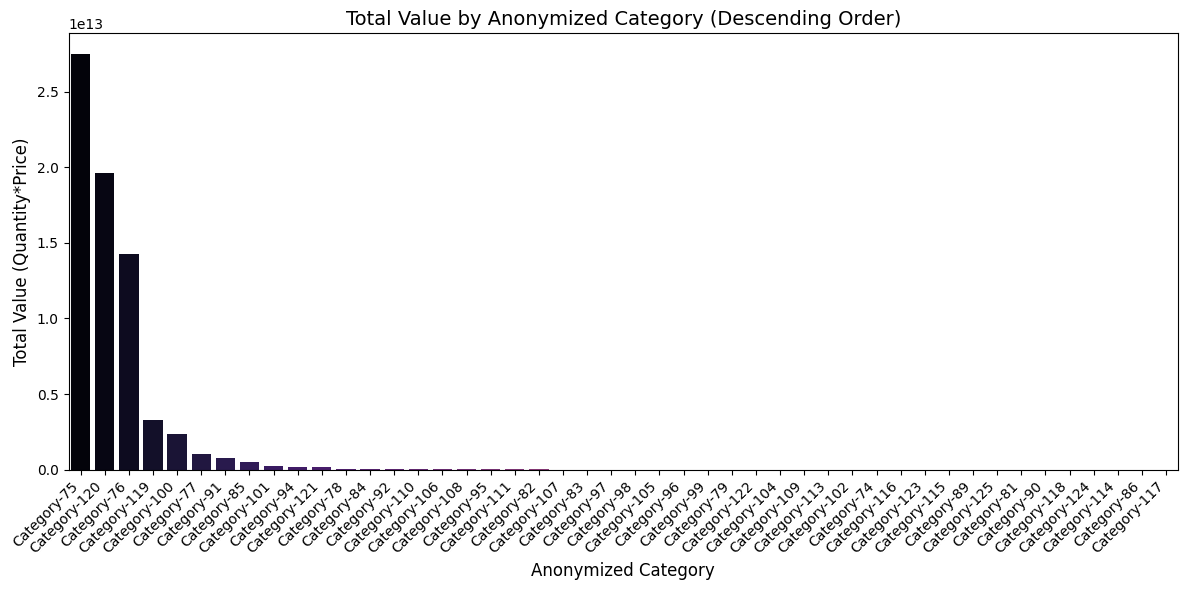

In [25]:

# Grouping data and calculating total quantity and value
category_summary = kt_df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'UNIT PRICE']].sum()

# Sorting by Quantity in descending order
category_summary = category_summary.sort_values(by=['QUANTITY'], ascending=False).reset_index()

# Plotting the total quantity by category
plt.figure(figsize=(12, 6))
sns.barplot(x='ANONYMIZED CATEGORY', y='QUANTITY', data=category_summary, palette='viridis')
plt.title('Total Quantity by Anonymized Category (Descending Order)', fontsize=14)
plt.xlabel('Anonymized Category', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Calculating and sortting by Total Value in descending order
category_summary['Total Value (Quantity*Price)'] = category_summary['QUANTITY'] * category_summary['UNIT PRICE']
category_summary = category_summary.sort_values(by=['Total Value (Quantity*Price)'], ascending=False).reset_index(drop=True)

# Plotting the total value (quantity * unit price) by category
plt.figure(figsize=(12, 6))
sns.barplot(x='ANONYMIZED CATEGORY', y='Total Value (Quantity*Price)', data=category_summary, palette='magma')
plt.title('Total Value by Anonymized Category (Descending Order)', fontsize=14)
plt.xlabel('Anonymized Category', fontsize=12)
plt.ylabel('Total Value (Quantity*Price)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [26]:
# In my second chart above, 1e13 represents 10^13

In [27]:
# 2.Total Quantity and Value grouped by Anonymized Business
kt_df.groupby('ANONYMIZED BUSINESS')[['QUANTITY', 'UNIT PRICE']].sum()
# Table view below

,QUANTITY,UNIT PRICE
ANONYMIZED BUSINESS,,
Business-0000,8,10445.0
Business-0005,1,2645.0
Business-0029,26,18385.0
Business-003d,98,73251.0
Business-0072,127,194501.0
...,...,...
Business-ffa9,3,6740.0
Business-ffae,6,9890.0
Business-ffb1,266,259006.0


Trends Over Time:

In [28]:
# Analysis of sales trends (Value and Quantity) by Month-Year.
# Time series plot showing seasonal patterns or changes in sales performance

In [29]:
# Groupping data by Month-Year and calculate total quantity and total value
time_series_data = kt_df.groupby('Month-Year').agg(
    {'QUANTITY': 'sum', 'UNIT PRICE': 'mean'}
)
# To compute total value which is the multiplication of quantity and unit price, I've used the Unit Price mean.
# Total Value based on quantity and average unit price
time_series_data['Total Value'] = time_series_data['QUANTITY'] * time_series_data['UNIT PRICE']

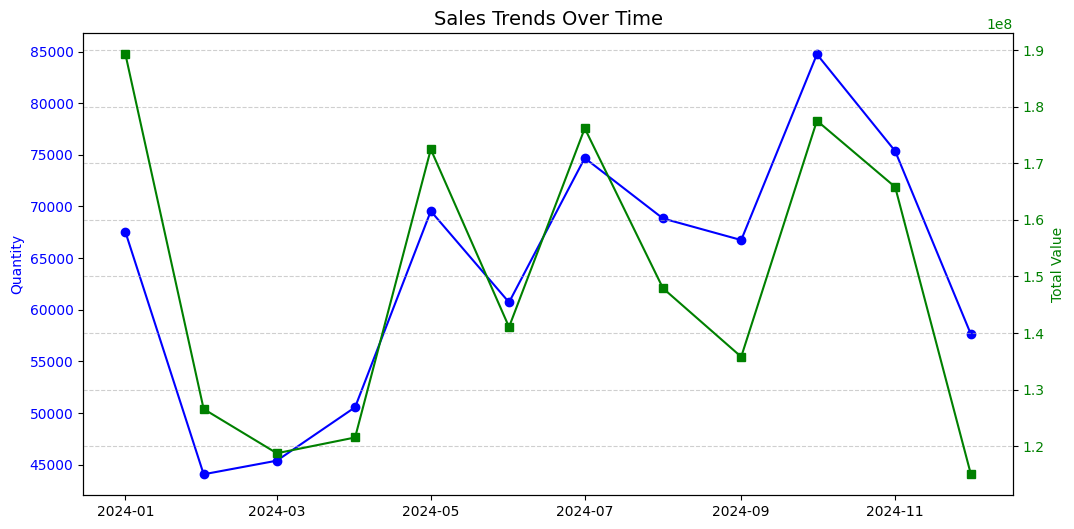

In [30]:
# I used a dual y-axis plot because total value is way larger than the quantity.
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Quantity on left y-axis
ax1.set_ylabel('Quantity', color='blue')
ax1.plot(time_series_data.index, time_series_data['QUANTITY'], label='Quantity', marker='o', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for Total Value
ax2 = ax1.twinx()
ax2.set_ylabel('Total Value', color='green')
ax2.plot(time_series_data.index, time_series_data['Total Value'], label='Total Value', marker='s', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and labels
plt.title('Sales Trends Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
# The second axis representing the Total Value is the format: 10^8

Performance Analysis


In [31]:
# Identifying the top 5 most frequently purchased products (Based on Quantity)
top_products = kt_df.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().nlargest(5).reset_index()
print(top_products)

  ANONYMIZED PRODUCT  QUANTITY
0       Product-66e0     46957
1       Product-e805     42602
2       Product-8f75     37566
3       Product-29ee     35940
4       Product-4156     28487


In [32]:
# Identifying the top 5 most valuable products (Bases on Value)
top_products_value = kt_df.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].mean().nlargest(5).reset_index()
print(top_products_value)

  ANONYMIZED PRODUCT    UNIT PRICE
0       Product-f084  15925.584906
1       Product-5a61  10920.000000
2       Product-6666   7990.000000
3       Product-41c3   7819.485294
4       Product-d527   7340.000000


# Section 3: Advanced Analysis

Customer Segmentation

In [33]:
# Segmentation analysis of Anonymized Business based on their purchasing behavior: Total Quantity Purchased

#  Groupping anonymized business and calculate total quantity purchased
business_summary = kt_df.groupby('ANONYMIZED BUSINESS')['QUANTITY'].sum().reset_index()
print(business_summary)

     ANONYMIZED BUSINESS  QUANTITY
0          Business-0000         8
1          Business-0005         1
2          Business-0029        26
3          Business-003d        98
4          Business-0072       127
...                  ...       ...
4795       Business-ffa9         3
4796       Business-ffae         6
4797       Business-ffb1       266
4798       Business-ffd2        37
4799       Business-ffff       110

[4800 rows x 2 columns]


In [34]:
# Sorting businesses by quantity purchased
business_summary = business_summary.sort_values(by='QUANTITY', ascending=False)

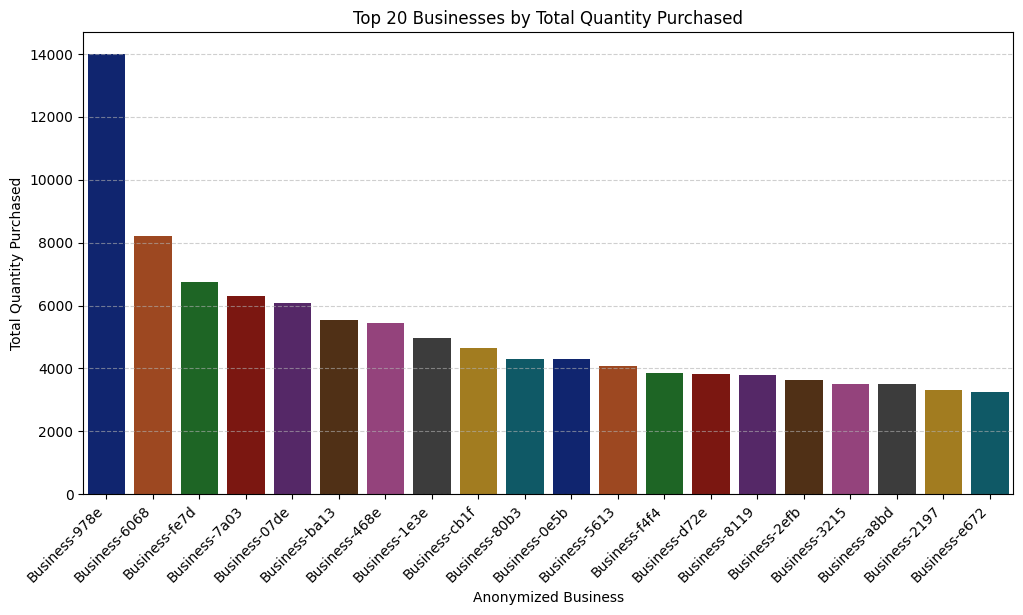

In [35]:
plt.figure(figsize=(12, 6))

# Bar chart
sns.barplot(data=business_summary.head(20), x='ANONYMIZED BUSINESS', y='QUANTITY', palette="dark")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Anonymized Business")
plt.ylabel("Total Quantity Purchased")
plt.title("Top 20 Businesses by Total Quantity Purchased")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


My Additional Insights


In [36]:
# Identifying businesses with the highest purchases
# Pareto Analysis (80/20 Rule): Finding out if 80% of purchases come from 20% of businesses

In [37]:
business_summary['Cumulative %'] = business_summary['QUANTITY'].cumsum() / business_summary['QUANTITY'].sum()
top_20_percent = business_summary[business_summary['Cumulative %'] <= 0.8]
print(f"Number of businesses contributing to 80% of sales: {len(top_20_percent)}")


Number of businesses contributing to 80% of sales: 766


In [38]:
# Segmentation analysis of Anonymized Business based on their purchasing behavior: Total Value contributed

# Aggregating total value per business
business_segmentation = kt_df.groupby('ANONYMIZED BUSINESS').agg(
    {'QUANTITY': 'sum', 'UNIT PRICE': 'mean'})


In [39]:
# Total value (Quantity*Avg Unit Price )
business_segmentation['Total Value'] = business_segmentation['QUANTITY'] * business_segmentation['UNIT PRICE']

In [40]:
# Sortting businesses by Total Value (descending)
business_segmentation = business_segmentation.sort_values(by='Total Value', ascending=False)

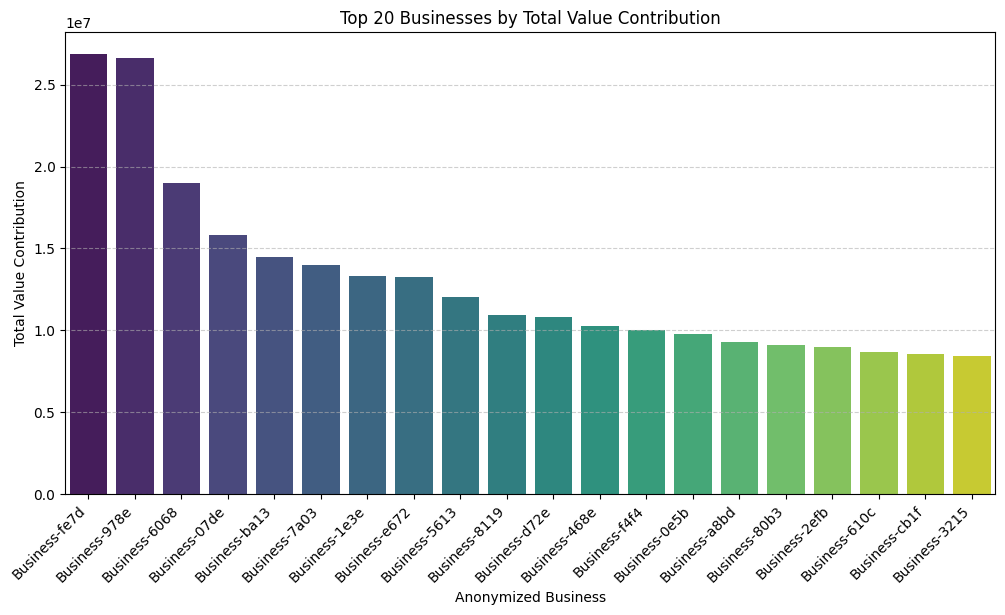

In [41]:
# Top 20 businesses by Total Value
plt.figure(figsize=(12, 6))
sns.barplot(data=business_segmentation.head(20), x=business_segmentation.head(20).index, y="Total Value", palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Anonymized Business")
plt.ylabel("Total Value Contribution")
plt.title("Top 20 Businesses by Total Value Contribution")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [42]:
# Classification into 3 groups (High Value, Medium Value, Low Value)
# Segments based on contribution percentiles
business_segmentation['Segment'] = pd.qcut(business_segmentation['Total Value'], q=[0, 0.25, 0.75, 1.0],
                                           labels=["Low", "Medium", "High"])

# Count of businesses in each segment
print(business_segmentation['Segment'].value_counts())


Segment
Medium    2399
Low       1201
High      1200
Name: count, dtype: int64


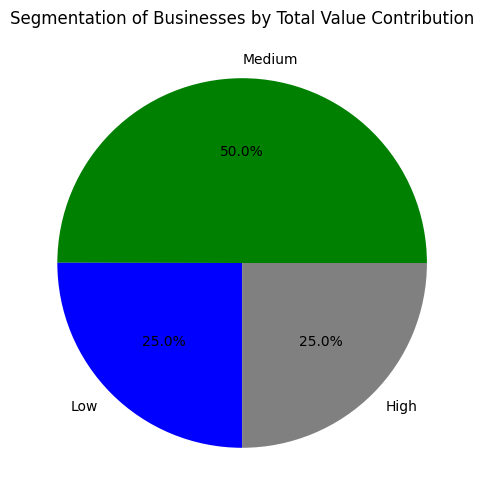

In [43]:
# Pie chart for segmentation
plt.figure(figsize=(6, 6))
business_segmentation['Segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'gray'])
plt.title("Segmentation of Businesses by Total Value Contribution")
plt.ylabel("")  # To hide y-label
plt.show()


---- Recommendations for each group ---

 1. High Contribution Businesses (Top 25%)
Engagement Strategy
- Exclusive Loyalty Programs: Offer priority services, special discounts, or cashback incentives to encourage repeat purchases.
- Dedicated Account Managers: Assign a personal relationship manager for tailored services and faster issue resolution.
- Early Access to Offers: Provide exclusive first-hand access to new products, premium support, and special pricing deals.
- Volume-Based Discounts: Encourage bulk purchases by offering progressive discounts based on quantity ordered.
- Co-Branding or Partnership Opportunities: Explore joint ventures or co-marketing strategies to deepen relationships.

2. Medium Contribution Businesses (Middle 50%)
Engagement Strategy
- Targeted Promotions & Bundled Offers: Provide tailored offers based on their purchasing history (e.g., "Buy X, Get Y Free").
- Flexible Payment Terms: Consider installment plans or credit options to encourage higher spending.
- Regular Check-Ins & Upselling: Use personalized email campaigns or calls to introduce related products/services.
- Training & Support Programs: Offer webinars, guides, or industry insights to help them optimize product use.
- Referral Incentives: Reward them for bringing in new customers.

3. Low Contribution Businesses (Bottom 25%)
Engagement Strategy
- Onboarding & Education: Provide step-by-step onboarding materials, product demos, and guides.
- Freemium or Trial Offers: Offer introductory discounts or free samples to increase engagement.
- Automated Follow-Ups: Use email campaigns and reminders to encourage re-purchases.
- Exit Surveys & Feedback Requests: Understand why they are not buying more and address their concerns.
- Segment-Based Upsell Strategies: Gradually introduce them to higher-value offerings through personalized recommendations.

Additional Considerations
- Monitor Customer Movement: Businesses can shift between segments over time. Track their behavior and adjust strategies accordingly.
- Data-Driven Engagement: Use analytics to understand why some businesses drop off or grow in purchasing power.
- Cross-Sell Opportunities: Suggest related products/services based on past purchases to maximize sales potential.


In [44]:
# Segmentation analysis of anonymized businesses based on purchase frequency
# Number of transactions per business


Purchasing Behavior metrics
*   Transaction frequency = Count of transactions
*   Total Quantity Purchased = Sum of Quantity
*   Average Order Value = Mean of Quantity * Unit Price
*   Total Purchase Value = Sum of Quantity * Unit Price





In [45]:

# Data grouped by Anonymized Business
business_segmentation = kt_df.groupby('ANONYMIZED BUSINESS').agg(
    Transaction_Frequency=('QUANTITY', 'count'),   # Number of purchases
    Total_Quantity=('QUANTITY', 'sum'),            # Total quantity purchased
    Average_Order_Value=('UNIT PRICE', 'mean')     # Average unit price
)

# Total Purchase Value
business_segmentation['Total_Purchase_Value'] = business_segmentation['Total_Quantity'] * business_segmentation['Average_Order_Value']

# Reset index for plotting
business_segmentation = business_segmentation.reset_index()

# Top businesses by transaction frequency
print(business_segmentation.sort_values(by='Transaction_Frequency', ascending=False).head(10))


     ANONYMIZED BUSINESS  Transaction_Frequency  Total_Quantity  \
2906       Business-978e                   2614           13991   
277        Business-0e5b                   1919            4289   
1873       Business-6068                   1474            8214   
1555       Business-4fee                   1290            2036   
1941       Business-63d9                   1285            2212   
2503       Business-80b3                   1236            4303   
144        Business-07de                   1160            6065   
2353       Business-7a03                   1147            6318   
4130       Business-dbce                   1126            2458   
4585       Business-f4f4                   1112            3852   

      Average_Order_Value  Total_Purchase_Value  
2906          1903.858837          2.663689e+07  
277           2279.354872          9.776153e+06  
1873          2311.655360          1.898794e+07  
1555          2184.300000          4.447235e+06  
1941        

# Distribution of Transaction Frequency below

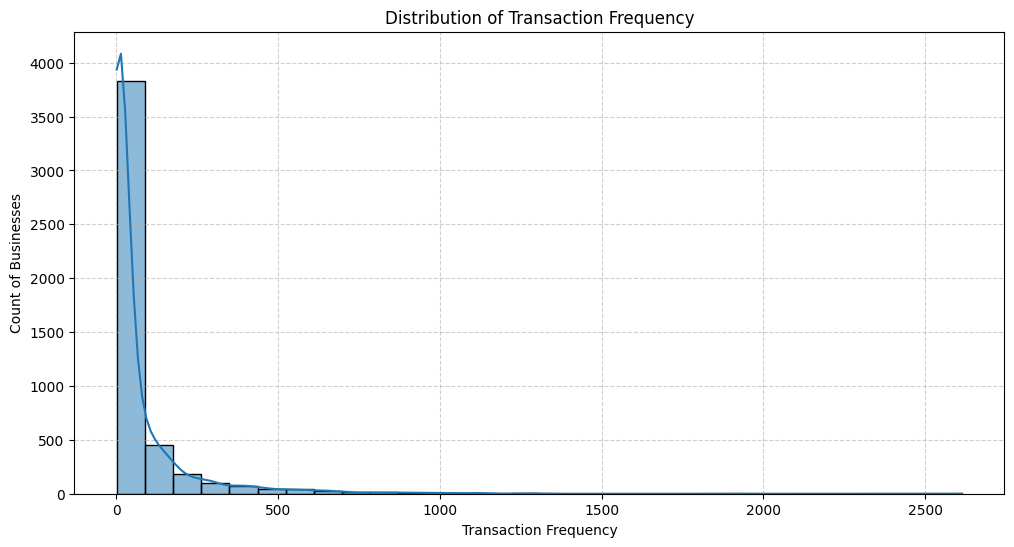

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(business_segmentation['Transaction_Frequency'], bins=30, kde=True)
plt.title("Distribution of Transaction Frequency")
plt.xlabel("Transaction Frequency")
plt.ylabel("Count of Businesses")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


From the above KDE plot, the highest bar on the left shows that many businesses have few transactions
A long tail towards the right shows that some businesses have significantly higher transactions
This is suggests a right-skewed distribution, where a small number of businesses contribute to a large portion of transactions

-Next Steps
Investigate reasons for low transaction frequency: Are these seasonal buyers? New customers?
Target the high-frequency businesses for possible premium services or bulk discounts.
Look at time trends – Has transaction frequency changed over months?

 

In [47]:
# Relationship Between Quantity and Purchase Value

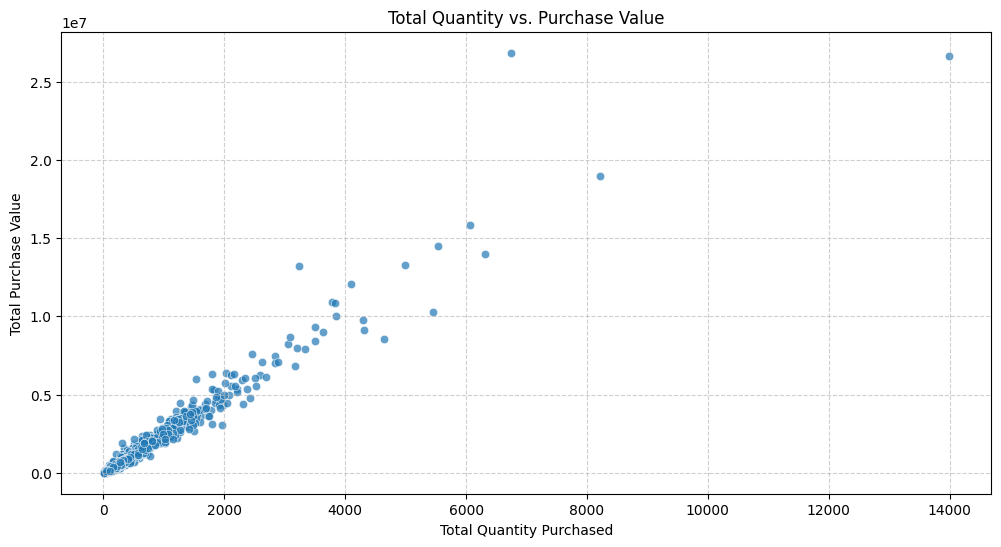

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=business_segmentation, x='Total_Quantity', y='Total_Purchase_Value', alpha=0.7)
plt.title("Total Quantity vs. Purchase Value")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Purchase Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Additionally, we can use K-means clustering to segment businesses based on their purchasing behavior

High-frequency, High Value Buyers - Large purchases, frequent transactions
Occasional Large Buyers - Few transactions but high order value
Low-value, Low-frequency Buyers - Smaller, infrequent purchases

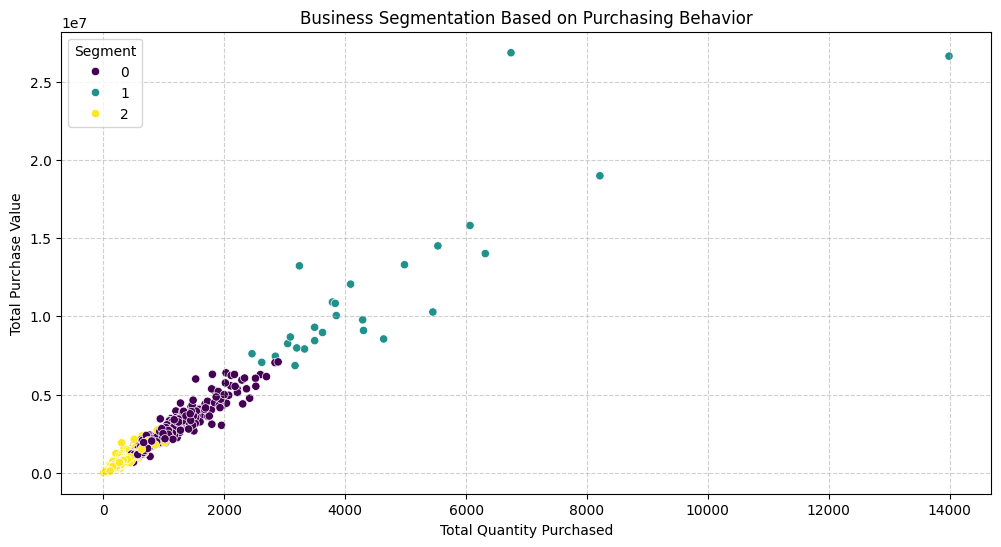

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = business_segmentation[['Transaction_Frequency', 'Total_Quantity', 'Total_Purchase_Value']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
business_segmentation['Segment'] = kmeans.fit_predict(features_scaled)

# Visualizing Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=business_segmentation, x='Total_Quantity', y='Total_Purchase_Value', hue='Segment', palette="viridis")
plt.title("Business Segmentation Based on Purchasing Behavior")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Purchase Value")
plt.legend(title="Segment")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Clusters of Businesses frrom the above plot:

Segment 0: Represents a large number of businesses with lower purchase quantities and values.
Segment 1: Businesses with moderate to high purchasing behavior.
Segment 2: Businesses with very low purchase quantities and values.
Trend:

There is a clear positive correlation
Businesses purchasing more quantity tend to have a higher total purchase value.
A few outliers in Segment 1 show extremely high purchases compared to others.

Forecasting

In [ ]:
# Forecasting total sales (Value) for the next three months.

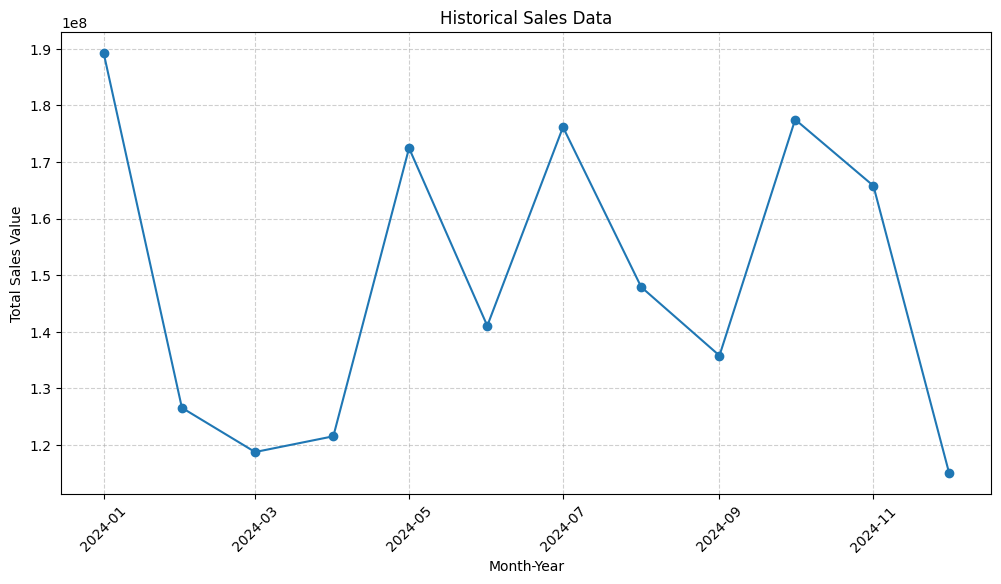

In [ ]:
# Ensuring the Month-Year column is in datetime format and set as an index
time_series_data.index = pd.to_datetime(time_series_data.index)

# Sorting the date by date
time_series_data = time_series_data.sort_index()

# Plot historical sales data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Total Value'], marker='o', linestyle='-')
plt.title('Historical Sales Data')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# I'll use ARIMA (AutoRegressive Integrated Moving Average) to forecast
# ARIMA works well when the data shows trends but there's no seasonality

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


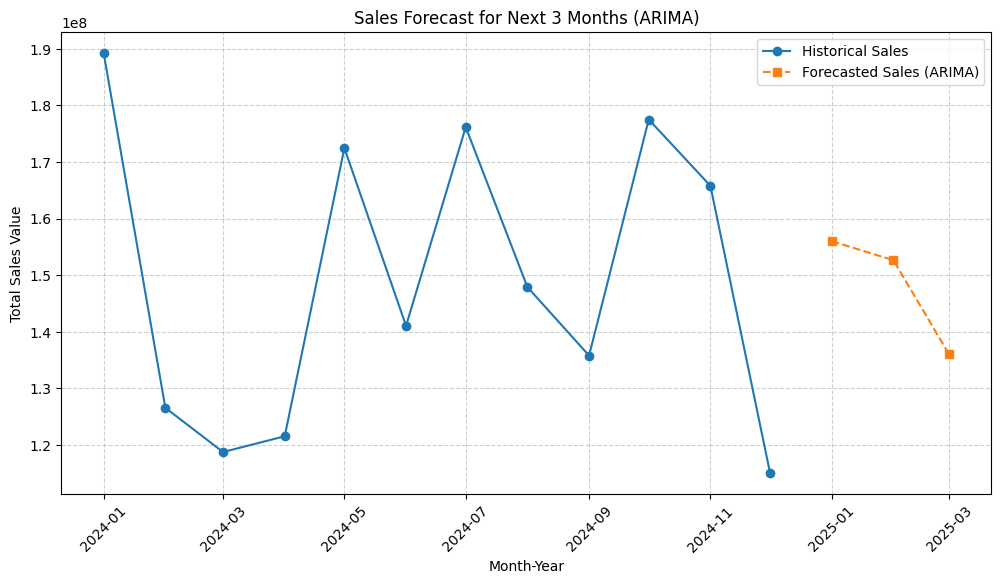

2025-01-01    1.560152e+08
2025-02-01    1.526488e+08
2025-03-01    1.360201e+08
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (using automatic order selection)
arima_model = ARIMA(time_series_data['Total Value'], order=(2, 1, 2))  # ARIMA(p,d,q)
arima_fit = arima_model.fit()

# Forecasting next 3 months
forecast_arima = arima_fit.forecast(steps=3)

# Results
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Total Value'], label='Historical Sales', marker='o')
plt.plot(forecast_arima.index, forecast_arima, label='Forecasted Sales (ARIMA)', marker='s', linestyle='dashed')
plt.title('Sales Forecast for Next 3 Months (ARIMA)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(forecast_arima)


Anomaly Detection

In [ ]:
# Identitfying any unusual spikes or drops in sales performance (Quantity or Value) with possible reasons based on the data


To detect anomalies in sale performance
*   Visualize trends to spot irregular patterns
*   Interquartile range to detect outliers
*   Identify possible causes based on the data

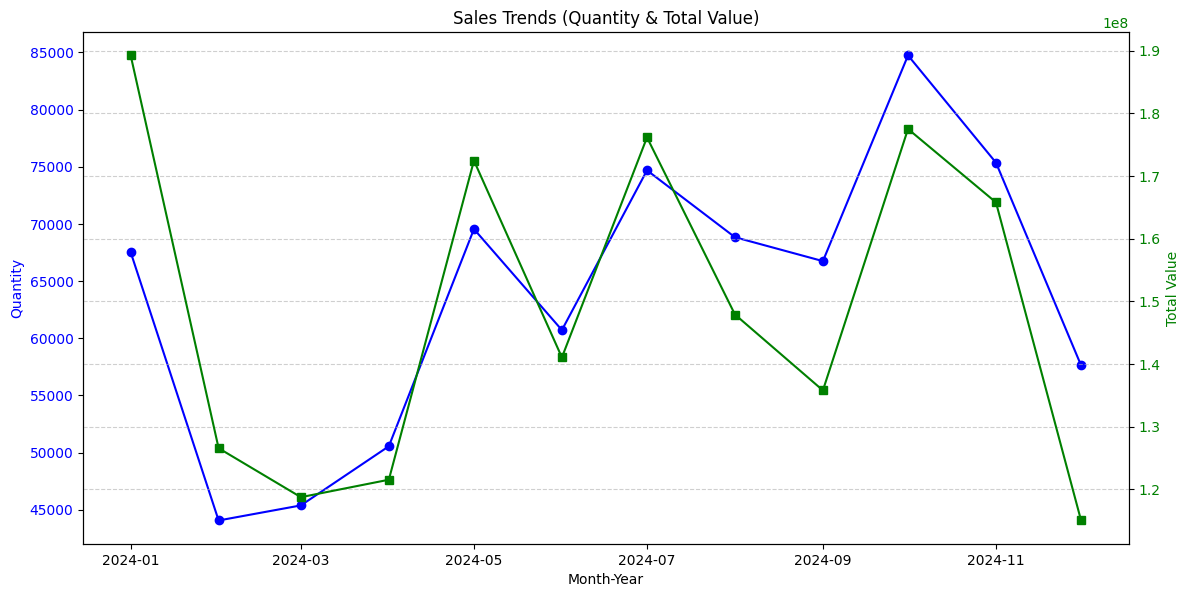

In [ ]:
# Plot Quantity and Total Value to observe unusual spikes or drops

# Convert Month-Year to datetime and sort
time_series_data.index = pd.to_datetime(time_series_data.index)
time_series_data = time_series_data.sort_index()

# Plotting Quantity and Total Value
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Month-Year")
ax1.set_ylabel("Quantity", color="blue")
ax1.plot(time_series_data.index, time_series_data['QUANTITY'], marker='o', linestyle='-', color="blue", label="Quantity")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Total Value", color="green")
ax2.plot(time_series_data.index, time_series_data['Total Value'], marker='s', linestyle='-', color="green", label="Total Value")
ax2.tick_params(axis="y", labelcolor="green")

fig.tight_layout()
plt.title("Sales Trends (Quantity & Total Value)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Calculate IQR for Quantity and Total Value
Q1 = time_series_data[['QUANTITY', 'Total Value']].quantile(0.25)
Q3 = time_series_data[['QUANTITY', 'Total Value']].quantile(0.75)
IQR = Q3 - Q1

# Defining anomalies as values outside 1.5 * IQR
quantity_anomalies_iqr = time_series_data[
    (time_series_data['QUANTITY'] < (Q1['QUANTITY'] - 1.5 * IQR['QUANTITY'])) |
    (time_series_data['QUANTITY'] > (Q3['QUANTITY'] + 1.5 * IQR['QUANTITY']))
]

value_anomalies_iqr = time_series_data[
    (time_series_data['Total Value'] < (Q1['Total Value'] - 1.5 * IQR['Total Value'])) |
    (time_series_data['Total Value'] > (Q3['Total Value'] + 1.5 * IQR['Total Value']))
]

print("\nIQR-based anomalies in Quantity:")
print(quantity_anomalies_iqr[['QUANTITY']])

print("\nIQR-based anomalies in Total Value:")
print(value_anomalies_iqr[['Total Value']])



IQR-based anomalies in Quantity:
Empty DataFrame
Columns: [QUANTITY]
Index: []

IQR-based anomalies in Total Value:
Empty DataFrame
Columns: [Total Value]
Index: []


1.   This means there were no anomalies detected in Quantity and Total Value
2.   No value was significantly higher or lower than the usual range of data

Possible reasons are as follows:
- The sales data provided does not have extreme variations
- Sale fluctuation might be normal and not considered anomalies

If detected, possible reasons for anomalies:
- For spikes, high sales due to discounts or offers
- For drops, when there's an end of a promotion perido
- Sales my increase during holidays, or specific industry cycles
- A sharp decline may indicate inventory issues or disruptions in suply chain
- Inflation or recession-like trends can also cause demand changes


Correlation Analysis: Relationship between Quantity and Total Value

In [ ]:
# +1 is a strong positive correlation, 0 means no correlation, and -1 is a strong negative correlation
# 0.81 is a fairly strong positive correlation
import seaborn as sns
import scipy.stats as stats

# Pearson correlation
correlation = time_series_data['QUANTITY'].corr(time_series_data['Total Value'])
print(f"Correlation between Quantity and Total Value: {correlation:.2f}")


Correlation between Quantity and Total Value: 0.81


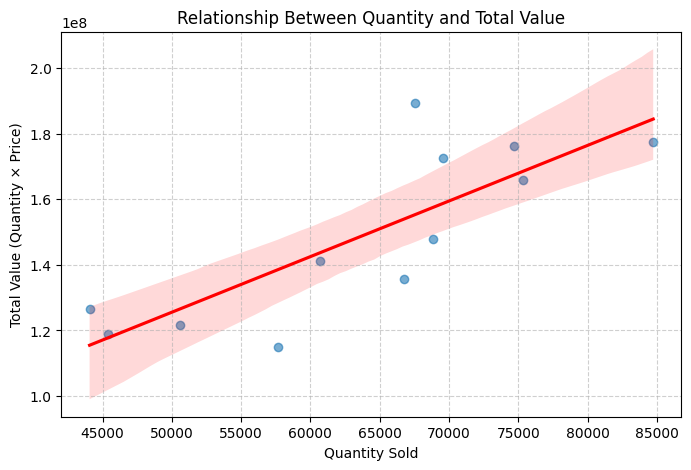

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=time_series_data['QUANTITY'], y=time_series_data['Total Value'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Quantity Sold")
plt.ylabel("Total Value (Quantity × Price)")
plt.title("Relationship Between Quantity and Total Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



*   The correlation is 0.81 which is close to +1
*   This shows that sales are quantity-driven, i.e, increasing the number of items sold directly increases revenue
*   There should be more focus on higher sales volume strategies(discounts, bulk sales, etc)





# Section 4: Strategic Insights and Recommendations

Product Strategy
*   The first step is identifying the top-performing product category based on the following criteria
    - High Total Value - Ensures strong financial impact
    - High Quantity Sold - Indicates strong demand
    - Growth Potential - Consistent or increasing sales trends
*   Category_75 is the top category based on total value, and we prioritize based on:
    - It drives the most revenue
    - It has a strong demand of 151,330 quantity sold, indicating a strong customer preference
    - High potential for growth with further marketing
    - Competitive advantage because if it has higher margins, promotions can increase profitability
  
*   Marketing Strategy Recommendations.
    - Run targeted promotions such as offering deals and promotions to boost demand
    - Feature the product in ads and on digital platforms
    - Make the product more available in more locations or online platforms to expand distribution channels
    - Analyze customer segments to identify key buyers and tailor promotions accordingly








In [ ]:
category_summary = kt_df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'UNIT PRICE']].sum()
category_summary['Total Value'] = category_summary['QUANTITY'] * category_summary['UNIT PRICE']
category_summary = category_summary.sort_values(by=['Total Value'], ascending=False).reset_index()


In [ ]:
# Top category based on Total Value
top_category = category_summary.iloc[0]
print(f"Recommended Product Category: {top_category['ANONYMIZED CATEGORY']}")
print(f"Total Sales Value: {top_category['Total Value']:,}")
print(f"Total Quantity Sold: {top_category['QUANTITY']:,}")


Recommended Product Category: Category-75
Total Sales Value: 27,474,662,460,560.0
Total Quantity Sold: 151,330


Customer Retention

*   To identify businesses with reduced purchase frequency we do the following:
    - Track the purchase frequency over time for each business
    - Compare early vs recent transactions to detect declines (See the code below)
    - Provide re-engagement strategies to win back customers
*   Re-engagement strategies
    - Personalized offers and discounts to the identified lost customers
    - Follow-up emails and surveys to get to know what improvements these customers expect
    - Product recommendations based on past purchases by suggesting new products or bundle deals
    - Direct sales outreach; If high-value customers are dropping, assign sales rep to call them.



In [ ]:
# Grouping by Business and Month-Year to count transactions
business_freq = kt_df.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).size().reset_index(name='Transaction Count')

# Pivoting data to show trends over time
business_freq_pivot = business_freq.pivot(index='ANONYMIZED BUSINESS', columns='Month-Year', values='Transaction Count')

# Fill missing values with 0 (no transactions in that month)
business_freq_pivot = business_freq_pivot.fillna(0)


In [ ]:
# Total transactions in first 3 months vs last 3 months
first_period = business_freq_pivot.iloc[:, :3].sum(axis=1)  # First 3 months
recent_period = business_freq_pivot.iloc[:, -3:].sum(axis=1)  # Last 3 months

# Find businesses with declining frequency
declining_customers = business_freq_pivot.index[recent_period < first_period]
print(f"Businesses with reduced purchase frequency:\n{declining_customers}")


Businesses with reduced purchase frequency:
Index(['Business-00b7', 'Business-00f8', 'Business-010c', 'Business-016c',
       'Business-0197', 'Business-01de', 'Business-0204', 'Business-0287',
       'Business-02f9', 'Business-0309',
       ...
       'Business-fd80', 'Business-fd94', 'Business-fe3d', 'Business-fe63',
       'Business-fe7b', 'Business-fed0', 'Business-fef1', 'Business-ff19',
       'Business-ffb1', 'Business-ffd2'],
      dtype='object', name='ANONYMIZED BUSINESS', length=982)


Operational Efficiency

*   To optimize inventory management and supply chain processes:
    - Analyze product performance trends (fast vs. slow-moving items)
    - Identify seasonal demand fluctuations to adjust stock levels.
    - Suggest actionable improvements to reduce stockouts and excess inventory


*   Fast-moving products require frequent restocking and supply chain efficiency
*   Slow-moving products may cause excess inventory, therefore consider promotions or reduction of stocks

- For the months where demand spikes, adjust inventory stocking and supplier leads times
- For the months where there's demand drops, reduce stocks and offer discounts to help clear the inventory


    Recommendations
*   Recommendations for inventory and supply chain optimization
    - Implement demand forecasting using historical sales data to predict future demand and avoid excess stocks or stockouts. e.g If sales peaks in December, order stock in October to avoid delays
    - Adop just in time inventory to keep minimum stock levels and order supplies only when needed
    - Identifying suppliers with consistent delivery times and negotiate shorter lead times, you can consider secondary suppliers to avoid delays incase of unreliability
    - Reduce deadstock for the slow-moving products using discounts, bundle offers, and limited-time promotions to create urgency
    - Improve warehouse organization by storing fast-moving products near dispatch areas for faster order fulfillment








In [ ]:
# 1.Analyzing product performance
# Sales Velocity = (Total Quantity Sold) / (Time Period in Months)
# Stock Turnover Rate = (Total Sales Value) / (Average Inventory Value)

In [ ]:
# Group by product category and calculate total quantity and sales
product_performance = kt_df.groupby('ANONYMIZED CATEGORY').agg(
    {'QUANTITY': 'sum', 'UNIT PRICE': 'mean'}
).reset_index()

# Calculate Sales Velocity (Since the data spans 12 months, I'll divide by 12)
product_performance['Sales Velocity'] = product_performance['QUANTITY'] / 12

# Ranking products based on Sales Velocity
product_performance = product_performance.sort_values(by='Sales Velocity', ascending=False)

# Classifying products as Fast-Moving or Slow-Moving
threshold = product_performance['Sales Velocity'].median()  # Use median as the cutoff
product_performance['Category'] = product_performance['Sales Velocity'].apply(lambda x: 'Fast-Moving' if x > threshold else 'Slow-Moving')

print(product_performance[['ANONYMIZED CATEGORY', 'Sales Velocity', 'Category']])


   ANONYMIZED CATEGORY  Sales Velocity     Category
18        Category-120    14142.916667  Fast-Moving
25         Category-75    12610.833333  Fast-Moving
0         Category-100     6402.000000  Fast-Moving
26         Category-76     5976.583333  Fast-Moving
17        Category-119     5694.333333  Fast-Moving
27         Category-77     2371.250000  Fast-Moving
40         Category-94     1972.333333  Fast-Moving
34         Category-85     1916.416667  Fast-Moving
38         Category-91     1737.750000  Fast-Moving
1         Category-101     1630.333333  Fast-Moving
19        Category-121     1222.416667  Fast-Moving
33         Category-84      994.416667  Fast-Moving
9         Category-110      877.416667  Fast-Moving
28         Category-78      813.833333  Fast-Moving
7         Category-108      813.000000  Fast-Moving
39         Category-92      579.416667  Fast-Moving
10        Category-111      559.583333  Fast-Moving
5         Category-106      543.416667  Fast-Moving
31         C

In [ ]:
# 2.Identifying seasonal demand patterns
# To optimize inventory, we analyze trends by month to detect demand spikes

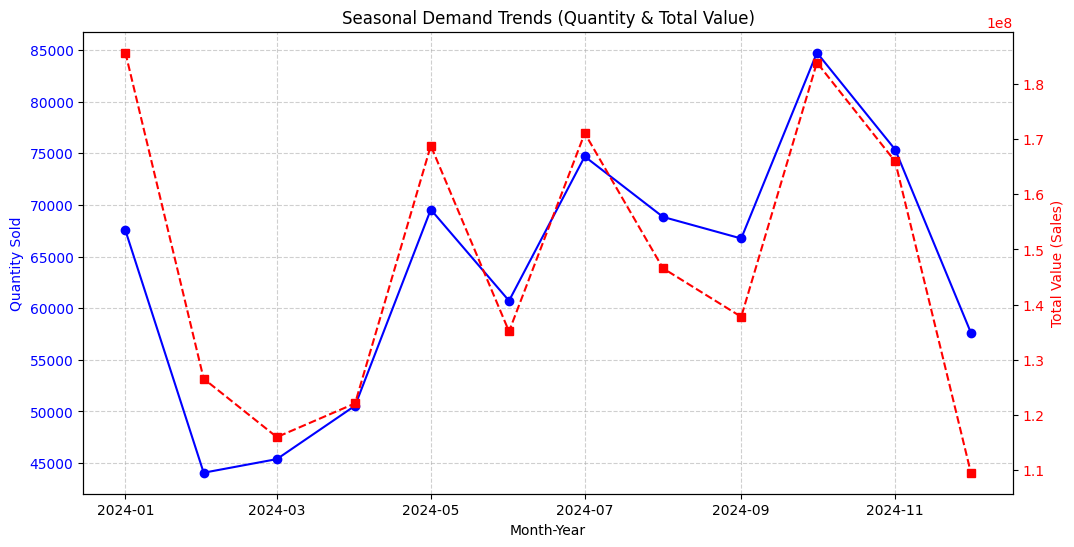

In [ ]:
# Since quantity and total value are on different scales, I will plot them on different axes as I did on the previous plots above.
import seaborn as sns

# Total Value calculation from Quantity and Unit Price
kt_df['Total Value'] = kt_df['QUANTITY'] * kt_df['UNIT PRICE']

# Group by Month-Year and sum Quantity and Total Value
seasonal_trends = kt_df.groupby('Month-Year')[['QUANTITY', 'Total Value']].sum()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Quantity on primary axis
ax1.set_xlabel("Month-Year")
ax1.set_ylabel("Quantity Sold", color="blue")
ax1.plot(seasonal_trends.index, seasonal_trends['QUANTITY'], marker='o', color="blue", label="Quantity")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.6)

# Create secondary axis for Total Value
ax2 = ax1.twinx()
ax2.set_ylabel("Total Value (Sales)", color="red")
ax2.plot(seasonal_trends.index, seasonal_trends['Total Value'], marker='s', color="red", linestyle="dashed", label="Total Value")
ax2.tick_params(axis="y", labelcolor="red")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add title
plt.title("Seasonal Demand Trends (Quantity & Total Value)")

# Show the plot
plt.show()


# Section 5: Dashboard and Reporting

In [ ]:
# exporting my dataframe to an excel
# I have attached a Power BI dasboard for your review
kt_df.to_csv('kt_df.csv', index=False)

# Bonus Section

# Predictive Analysis:

Identifying External Factors Influencing Sales & Incorporating Them into Future Analyses
1. External Factors That Could Influence Sales
Several external factors can impact sales performance, including:

- Economic Conditions: Inflation, interest rates, and GDP growth can influence purchasing power.
- Competitor Actions: Price changes, new product launches, and marketing strategies from competitors.
- Seasonality & Demand Trends: Certain times of the year (e.g., holidays, harvest seasons) may drive fluctuations in sales.
- Supply Chain Disruptions: Changes in raw material availability, logistics issues, or supplier constraints.
- Consumer Preferences & Trends: Shifts in customer behavior, such as demand for eco-friendly or digital payment options.
- Government Policies & Regulations: Tax policies, subsidies, and trade restrictions may affect pricing and demand.
2. Proposed Methodology to Incorporate External Factors
To integrate these factors into predictive sales analysis, we can use a multi-step approach:

- Step 1: Data Collection
Sales Data: Historical transaction data from Power BI (Quantity, Value, and Categories).
External Datasets:
Economic Data: Inflation rates, GDP, currency exchange rates from sources like World Bank, IMF, or local government databases.
Competitor Data: Pricing and product availability using web scraping or third-party market research reports.
Weather & Seasonal Trends: If products are seasonal, include weather patterns from meteorological databases.
Social Media & Customer Sentiment: Track customer discussions on platforms like Twitter and Google Trends for demand signals.
- Step 2: Data Integration
Merge sales data with external factors to create a comprehensive dataset.
Ensure proper time alignment, e.g., linking monthly sales trends with monthly inflation rates.
- Step 3: Feature Engineering
Convert categorical external factors into numerical indicators (e.g., inflation rate percentage, competitor pricing index).
Create lag variables to capture delayed effects (e.g., a price increase last month may impact sales this month).
- Step 4: Predictive Modeling
statistical models to forecast future sales:
ARIMAX (Autoregressive Integrated Moving Average with Exogenous Variables): Extends ARIMA by incorporating external variables like inflation and seasonality.
Regression Models: Linear Regression, Random Forest, or XGBoost to predict sales based on external factors.
- Step 5: Model Evaluation & Continuous Monitoring
Validate predictions against actual sales data.
Adjust models periodically based on new trends.
Implement dashboards in Power BI with external data overlays for real-time decision-making.

- Key Takeaways
External factors like economic trends, competitor pricing, and seasonality can impact sales.
Using ARIMAX, regression models, or deep learning can improve sales forecasting accuracy.
Integrating these insights into Power BI allows businesses to make data-driven decisions.






# Scalability 
1. Data Storage Optimizations
Use Parquet Format Instead of CSV/Excel

Parquet is columnar, allowing efficient storage and retrieval.
Reduces file size significantly compared to CSV.
Faster reading/writing performance in Python and Power BI.
Database Storage Instead of Files

Store data in a relational database (PostgreSQL, MySQL) or a big data system (Google BigQuery, AWS Redshift).
Allows querying specific subsets rather than loading entire datasets.
Indexing for Faster Access

Index key columns like Customer ID, Date, and Product Category to improve lookup speeds.
2. Data Processing Optimizations
Use Dask or PySpark Instead of Pandas

Pandas struggles with large datasets. Dask (parallelized Pandas) or PySpark (big data processing) can handle much larger data efficiently.
Vectorized Operations Instead of Loops

Use NumPy/Pandas vectorized calculations (.apply() or np.where()) rather than loops to improve performance.
Incremental Data Processing

Process only new or updated records instead of recalculating everything from scratch.
Batch Processing for Power BI

Instead of loading all data at once, use incremental refresh or aggregated summaries for better performance.
3. Analysis & Visualization Optimizations
Pre-Aggregate Data for Dashboards

Store monthly or weekly summaries instead of raw transactional data.
Reduces computation when creating visuals in Power BI.
Use Power BI's DirectQuery Instead of Import Mode

DirectQuery fetches data dynamically from the database without fully loading it into memory.
Optimize DAX Measures in Power BI

Avoid SUMX() over large datasets—prefer precomputed aggregates.
Use CALCULATE() wisely to filter only necessary data.






